## Import data

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import sys
import time
import scipy.stats
import os.path
from importlib import reload

# Set file paths and names
file_path = 'C:/Users/jlaru/OneDrive - Chapman University/Research/X-Ray Femtochemistry/Fermi 2017/Binned/BT1/'
file_name = 'XAS_037_038_bin.h5'

# Check that data file exists
if not os.path.exists(file_path+file_name) :
    raise NameError('File does not exist. Check file path and/or name.')

###################
### Import Data ###
###################
Success = True
fh5 = h5py.File(file_path+file_name, 'r')
# XES matrix
if '/BinnedData/xes_spec_3dmatrix' in fh5 :
    Success = True
    xesmatrix = fh5['/BinnedData/xes_spec_3dmatrix'].value
else :
    print('XAS data matrix missing')
    Success = False
# XES energy
if '/BinnedData/xes_x_ev' in fh5 :
    Success = True
    xesenergy = fh5['/BinnedData/xes_x_ev'].value
else :
    print('XES energy data missing')
    Success = False
# Delay
if '/BinnedData/delays_fs' in fh5 :
    Success = True
    delay = fh5['/BinnedData/delays_fs'].value
else :
    print('Delay data missing')
    Success = False
fh5.close()

if not Success :
    raise ImportError('Data analysis cancelled due to missing data')

In [68]:
xesdata=np.zeros((25,317))
i = 0
while i < 25 :
    j = 0
    while j < 4 :
        xesdata[i] = xesdata[i] + xesmatrix[i,j]
        j = j + 1
    i = i + 1

## Plot data

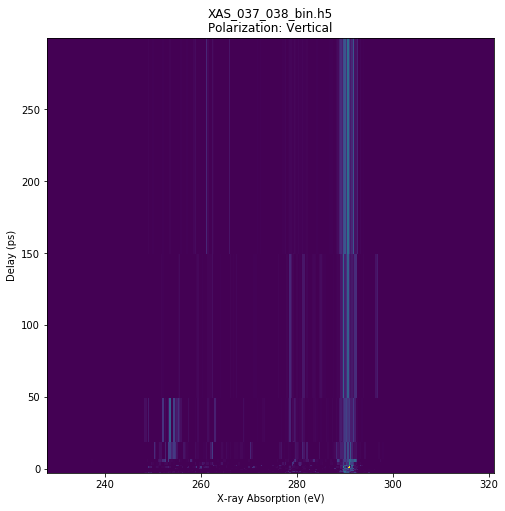

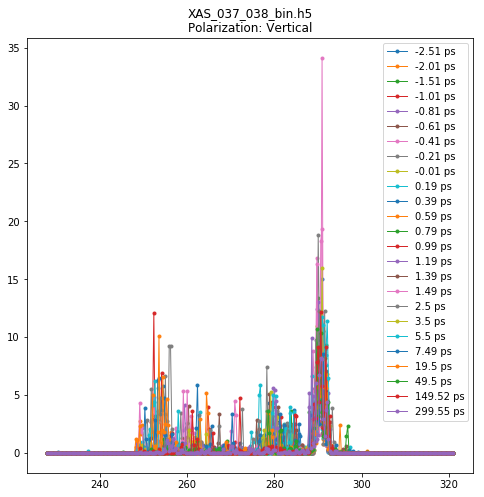

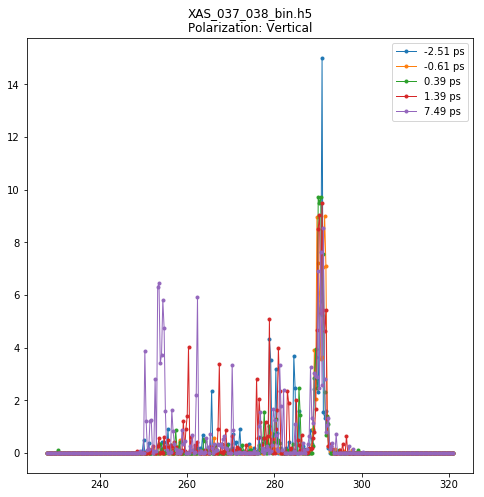

In [73]:
text_title = file_name+'\nPolarization: Vertical'

plt.figure(figsize = [8,8])
plt.pcolor(xesenergy, delay*1e-3, xesdata)
plt.xlabel('X-ray Absorption (eV)')
plt.ylabel('Delay (ps)')
plt.ylim([np.min(delay*1e-3), np.max(delay*1e-3)])
plt.title(text_title)

plt.figure(figsize = [8,8])
i = 0
while i < len(xesdata) :
    plt.plot(xesenergy,xesdata[i],'-o', ms=3, lw=1,label=(str(round(delay[i]*1e-3,2))+' ps'))
    i+= 1
plt.legend()
plt.title(text_title)

plt.figure(figsize = [8,8])
i = 0
while i < len(xesdata) :
    plt.plot(xesenergy,xesdata[i],'-o', ms=3, lw=1,label=(str(round(delay[i]*1e-3,2))+' ps'))
    i+= 5
plt.legend()
plt.title(text_title)

print('')